# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [5]:
import pandas as pd


columns = ['index','query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start','q. end', 's. start', 's. end', 'evalue', 'bit score','% positives', 'bonds', 'publications']
df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', comment='#', skiprows=6,names=columns,index_col=None)
df = df.drop(columns=['publications'])
df.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start','q. end', 's. start', 's. end', 'evalue', 'bit score','% positives', 'bonds', 'publications']
df = df.set_index('subject acc.ver')
df = df.drop(columns=['query acc.ver'])
df.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3


### Question 2
What is the average number of publications?

In [7]:
df['publications'] = pd.to_numeric(df['publications'], errors='coerce')  # Convert to numeric, replace errors with NaN
average = df['publications'].mean()
average

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [8]:
### Your code here . . .
df['bonds'] = df['bonds'].str.replace(',', '').str.strip()  # Remove commas and strip spaces
df['bonds'] = pd.to_numeric(df['bonds'], errors='coerce')  # Convert to numeric

# Filter rows where the 'bonds' column is greater than 15000
df_filtered = df[df['bonds'] > 15000]

# List the 'subject acc.ver' values
subjectList = df_filtered.index.tolist()
subjectList

['AGK29621.1',
 'AHG32084.1',
 '6G2J_H',
 'YP_002791042.1',
 'AGK29634.1',
 '0806162F',
 'YP_009112408.1',
 'YP_001876469.1',
 'YP_009092269.1',
 'AHG32149.1',
 'YP_009092074.1',
 'YP_009450474.1',
 'YP_004123270.1',
 'YP_009092073.1',
 'AHZ60901.1',
 'YP_004123350.1',
 'YP_009453754.1',
 'ADD46492.1',
 'YP_007025968.1',
 'YP_009453806.1',
 'YP_007024956.1',
 'ASM92364.1',
 'YP_006073044.1',
 'ASM92494.1',
 'ADG95699.1',
 'YP_004891275.1',
 'YP_009166014.1',
 'YP_009538416.1',
 'YP_009414182.1',
 'YP_009178854.1',
 'YP_009414415.1',
 'YP_009353908.1',
 'YP_009093743.1',
 'ABX45285.1',
 'YP_009414156.1',
 'YP_009414363.1']

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

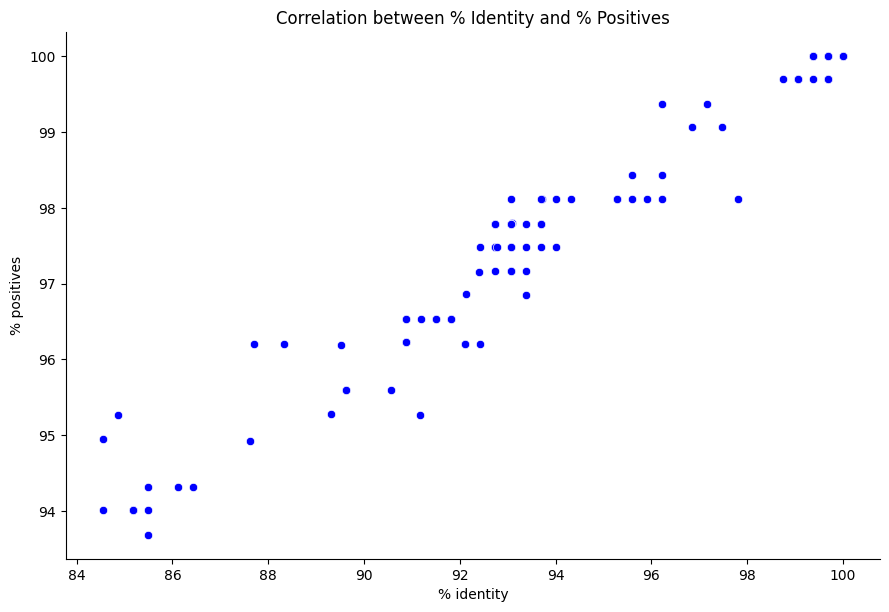

In [10]:
### Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(
    data=df,  # The DataFrame containing the data
    x='% identity',  # X-axis
    y='% positives',  # Y-axis
    kind='scatter',  # Type of plot (scatter plot)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio to make the plot wider
    color='blue'  # Color of the points
)

# Add a title to the plot
plt.title('Correlation between % Identity and % Positives')

# Show the plot
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [17]:
### Your code here . . .
# Load the protein source CSV directly from the GitHub link
protein_source = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")

# Merge the dataframes on 'subject acc.ver' and 'Protein'
merged_df = df.merge(protein_source, left_index=True, right_on="Protein", how="left")
merged_df.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Unnamed: 0,Protein,Source
0.0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,0.0,NP_904328.1,RefSeq
NaN,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN,AGK29621.1,NaN
1.0,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,2.0,YP_220563.1,GenPept
NaN,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN,ACM24502.1,NaN
NaN,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN,AHG32084.1,NaN
